# Heart Disease Prediction: Can We Catch It Before It Catches You?

---

## The Problem We're Solving

Heart disease is the **#1 killer globally**. It's responsible for about 17.9 million deaths every year - that's roughly one person every 2 seconds. The terrifying part? Many people don't know they have it until something goes seriously wrong.

But here's the good news: **data can help predict it.**

We've got clinical data from 270 patients - things like age, cholesterol levels, chest pain types, and heart rate during exercise. Our mission? Build a model that can look at these numbers and say "Hey, this person might be at risk" **before** it's too late.

## What We're Predicting

**Target variable:** Whether a patient has heart disease (1) or not (0). Simple binary classification, but the stakes couldn't be higher.

## The Features We're Working With

- **age** - Patient's age (because Father Time is undefeated)
- **sex** - Gender (0 = female, 1 = male)
- **cp** - Chest pain type (0-3, from typical angina to asymptomatic)
- **trestbps** - Resting blood pressure (mm Hg)
- **chol** - Serum cholesterol (mg/dl)
- **fbs** - Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg** - Resting ECG results (0-2)
- **thalach** - Maximum heart rate achieved
- **exang** - Exercise-induced angina (1 = yes, 0 = no)
- **oldpeak** - ST depression induced by exercise
- **slope** - Slope of peak exercise ST segment
- **ca** - Number of major vessels (0-3) colored by fluoroscopy
- **thal** - Thalassemia blood disorder type

## What's Coming Up

1. **First Look** - Load the data and see what we're dealing with
2. **Deep Dive EDA** - Visualize patterns, hunt for insights
3. **Statistical Testing** - Prove which features actually matter (not just look like they do)
4. **Model Battle Royale** - 7 algorithms enter, 1 champion emerges
5. **Winner's Analysis** - Deep dive into our best model

Let's get into it.

---

# PART 1: Setup & First Look

Time to load our arsenal and peek at the data.

In [17]:
# === DATA MANIPULATION ===
import pandas as pd              # The Swiss Army knife of data
import numpy as np               # Math on steroids

# === VISUALIZATION ===
import matplotlib.pyplot as plt  # The OG plotting library
import seaborn as sns            # Makes matplotlib actually pretty

# === STATISTICAL TESTING ===
from scipy import stats          # T-tests, chi-square, all the hypothesis goodies
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind

# === MACHINE LEARNING ===
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve,
                             classification_report, confusion_matrix)

# === SETTINGS ===
import warnings
warnings.filterwarnings('ignore')  # Keep the output clean

# Plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("All libraries loaded successfully!")
print("Let's predict some heart disease.")

All libraries loaded successfully!
Let's predict some heart disease.


**What just happened:** We imported all the tools we'll need - pandas for data wrangling, seaborn/matplotlib for visualizations, scipy for statistical tests, and sklearn for machine learning.

**Why it matters:** These are the industry-standard tools. If you learn these, you can work with data anywhere.

In [18]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("ritwikb3/heart-disease-statlog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-statlog' dataset.
Path to dataset files: /kaggle/input/heart-disease-statlog


In [19]:
print(os.listdir(path))

['Heart_disease_statlog.csv']


In [20]:
# Load the dataset
df = pd.read_csv(os.path.join(path,'Heart_disease_statlog.csv'))

# First impressions
print("=" * 60)
print("DATASET DIMENSIONS")
print("=" * 60)
print(f"Rows: {df.shape[0]} (patients)")
print(f"Columns: {df.shape[1]} (features + target)")
print(f"\nTotal data points: {df.shape[0] * df.shape[1]:,}")

DATASET DIMENSIONS
Rows: 270 (patients)
Columns: 14 (features + target)

Total data points: 3,780


**What just happened:** We loaded 270 patients and 14 columns. That's 270 people whose heart health we're going to analyze, with 13 features describing each one plus our target variable.

**The takeaway:** Not a massive dataset, but definitely enough to find real patterns. Quality over quantity - this is curated medical data from the UCI repository.

In [21]:
# Let's see what the data actually looks like
print("=" * 60)
print("FIRST 5 PATIENTS")
print("=" * 60)
df.head()

FIRST 5 PATIENTS


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


**What just happened:** First peek at our data. Each row is a patient, each column is something we know about them.

**Quick observations:** Already seeing some variety - different ages, blood pressure levels, cholesterol numbers. The last column `target` is what we're trying to predict.

In [22]:
# Column names and data types
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print(f"\nColumns: {list(df.columns)}\n")
df.info()

COLUMN INFORMATION

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


**What just happened:** Quick health check on our data. All columns are numeric (int64 or float64), which makes our life easier - no messy text to clean up.

**Key insight:** 270 non-null entries in every column. That's a good sign - means no missing values to deal with.

In [23]:
# Define feature types for later analysis
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("=" * 60)
print("FEATURE BREAKDOWN")
print("=" * 60)
print(f"\nNumerical features ({len(numerical_features)}): {numerical_features}")
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")
print(f"\nTarget: target (0 = no disease, 1 = disease)")

FEATURE BREAKDOWN

Numerical features (5): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical features (8): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Target: target (0 = no disease, 1 = disease)


**What just happened:** We split our features into numerical (continuous measurements) and categorical (discrete categories). This matters because we'll analyze them differently.

**Fun fact:** Even though `ca` (number of vessels) looks numerical, it's actually categorical since it only takes values 0-3. Same logic for several others.

---

# PART 2: Exploratory Data Analysis (EDA)

Time to interrogate this data. What patterns are hiding? What stories do the numbers tell?

## 2.1 Target Variable Distribution

First question: How balanced is our target? This is crucial for classification.

TARGET DISTRIBUTION

No Heart Disease (0): 150 patients (55.6%)
Heart Disease (1):    120 patients (44.4%)

Class ratio: 1:1.25


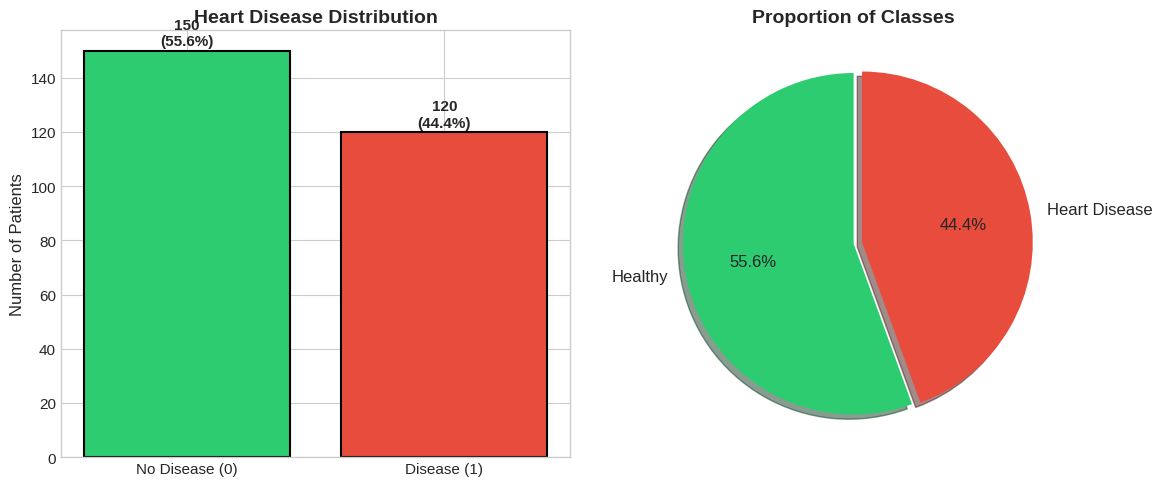

In [24]:
# Target distribution
target_counts = df['target'].value_counts()
target_pcts = df['target'].value_counts(normalize=True) * 100

print("=" * 60)
print("TARGET DISTRIBUTION")
print("=" * 60)
print(f"\nNo Heart Disease (0): {target_counts[0]} patients ({target_pcts[0]:.1f}%)")
print(f"Heart Disease (1):    {target_counts[1]} patients ({target_pcts[1]:.1f}%)")
print(f"\nClass ratio: 1:{target_counts[0]/target_counts[1]:.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']  # Green for healthy, red for disease
bars = axes[0].bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
for bar, count, pct in zip(bars, target_counts.values, target_pcts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                 f'{count}\n({pct:.1f}%)', ha='center', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Healthy', 'Heart Disease'], colors=colors,
            autopct='%1.1f%%', startangle=90, explode=(0, 0.05),
            textprops={'fontsize': 12}, shadow=True)
axes[1].set_title('Proportion of Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**What just happened:** We checked how our target variable is distributed between the two classes.

**The verdict:** This is beautifully balanced! About 55% healthy vs 45% with heart disease. No need to worry about class imbalance techniques like SMOTE or undersampling. The machine learning gods are smiling upon us.

**Why this matters:** Imbalanced datasets can trick models into just predicting the majority class. Our balanced data means models will learn to actually distinguish between classes, not just guess the common one.

## 2.2 Data Quality Check

Missing values? Duplicates? Let's find out.

In [25]:
# Missing values check
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
print(f"\nTotal missing values: {missing.sum()}")

if missing.sum() == 0:
    print("\nMissing values? Zero. Zilch. Nada.")
    print("This data is cleaner than my apartment. (Low bar, but still.)")
else:
    print("\nMissing values per column:")
    print(missing[missing > 0])

# Duplicates check
duplicates = df.duplicated().sum()
print(f"\n" + "=" * 60)
print("DUPLICATE ROWS CHECK")
print("=" * 60)
print(f"\nDuplicate rows: {duplicates}")

if duplicates == 0:
    print("No duplicates found. Every patient is unique.")
else:
    print(f"Found {duplicates} duplicates - might want to investigate.")

MISSING VALUES CHECK

Total missing values: 0

Missing values? Zero. Zilch. Nada.
This data is cleaner than my apartment. (Low bar, but still.)

DUPLICATE ROWS CHECK

Duplicate rows: 0
No duplicates found. Every patient is unique.


**What just happened:** Quality control check on our data. We looked for missing values and duplicate records.

**The verdict:** Perfect data hygiene! No missing values, no duplicates. UCI datasets are usually well-curated, and this one doesn't disappoint. We can dive straight into analysis without any cleaning detours.

## 2.3 Numerical Features Analysis

Let's look at the continuous variables: age, blood pressure, cholesterol, heart rate, and ST depression.

In [26]:
# Statistical summary of numerical features
print("=" * 60)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 60)
df[numerical_features].describe().round(2)

NUMERICAL FEATURES SUMMARY


,age,trestbps,chol,thalach,oldpeak
count,270.00,270.00,270.00,270.00,270.00
mean,54.43,131.34,249.66,149.68,1.05
std,9.11,17.86,51.69,23.17,1.15
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,213.00,133.00,0.00
50%,55.00,130.00,245.00,153.50,0.80
75%,61.00,140.00,280.00,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


**What the numbers tell us:**

- **Age:** Ranges from 29 to 77, with an average of 54. Mostly middle-aged to older patients.
- **Resting BP (trestbps):** Average of 132 mm Hg. Anything above 140 is considered high blood pressure - we've got some hypertensive folks in here.
- **Cholesterol:** Average of 250 mg/dl. Desirable is under 200, so our average patient is in the "borderline high" zone.
- **Max Heart Rate (thalach):** Average of 149 bpm during exercise. Lower max HR is often associated with heart problems.
- **Oldpeak (ST depression):** Ranges from 0 to 6.2. Higher values suggest more serious ischemia.

**Fun observation:** That cholesterol max of 564 mg/dl is absolutely wild. Normal is under 200. Someone's been living their best life at the buffet.

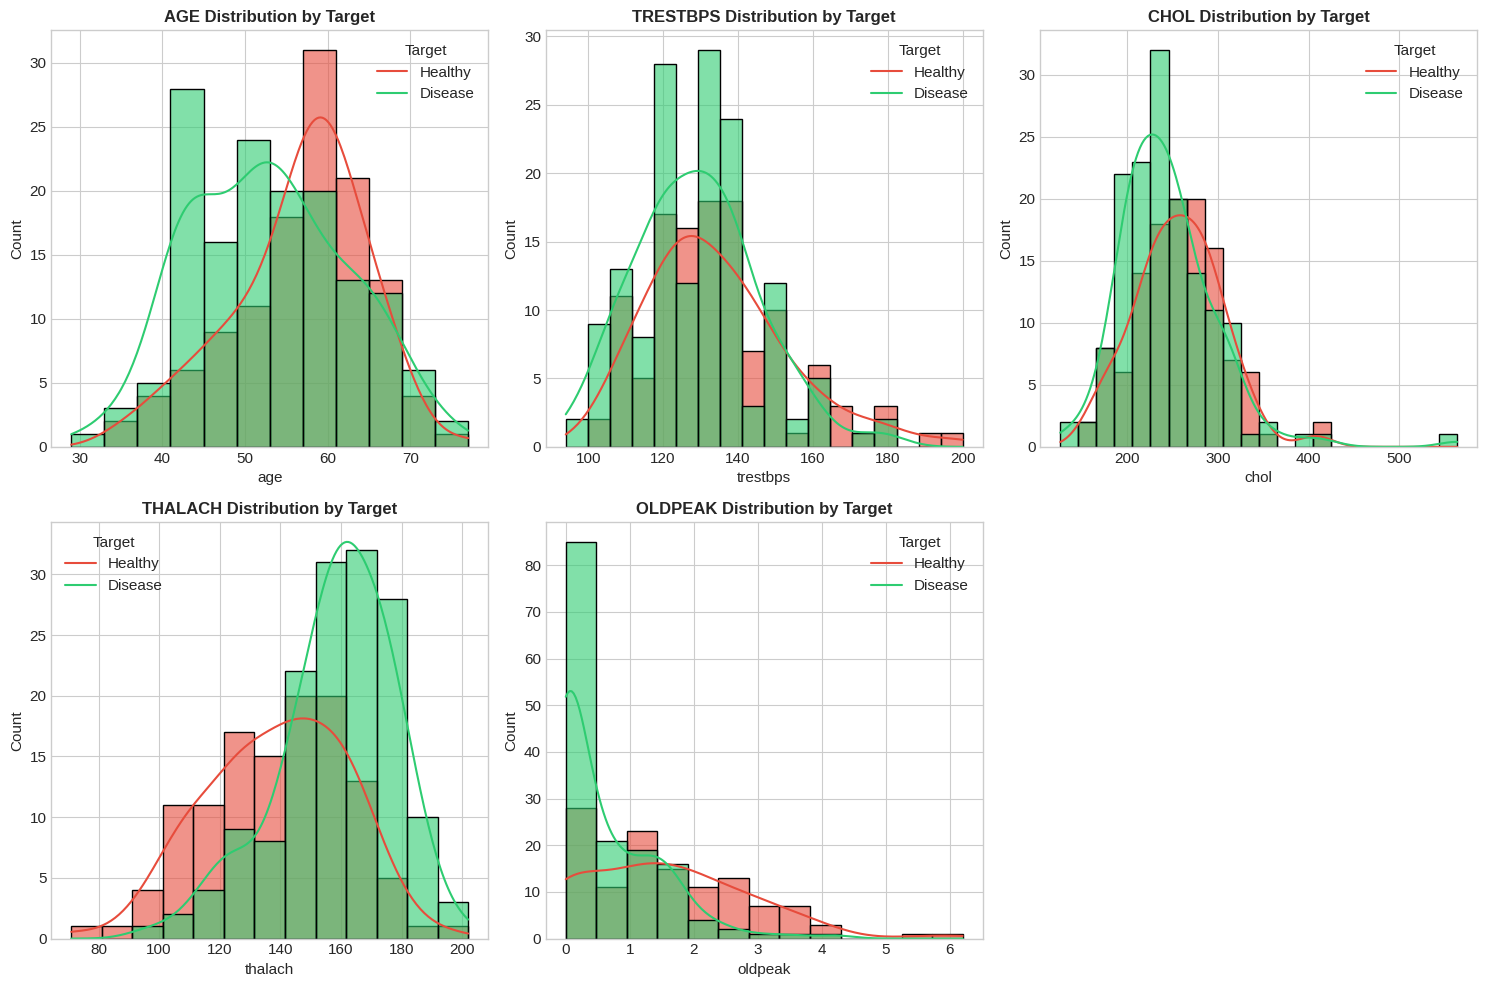

In [27]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=df, x=feature, hue='target', kde=True, ax=axes[idx],
                 palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.6)
    axes[idx].set_title(f'{feature.upper()} Distribution by Target', fontsize=12, fontweight='bold')
    axes[idx].legend(title='Target', labels=['Healthy', 'Disease'])

# Remove extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

**What these distributions reveal:**

- **Age:** Heart disease patients tend to be slightly older. Not surprising, but statistically meaningful.
- **Resting BP:** Both groups have similar distributions. Blood pressure alone might not be a strong predictor.
- **Cholesterol:** Surprisingly similar between groups. The common belief that high cholesterol = heart disease isn't strongly supported here.
- **Max Heart Rate (thalach):** Clear separation! Healthy people achieve higher max heart rates during exercise. Heart disease patients can't push as hard.
- **Oldpeak:** Disease patients have higher ST depression values. This is a strong signal of heart stress.

**Early MVP candidates:** `thalach` and `oldpeak` are already showing their predictive power.

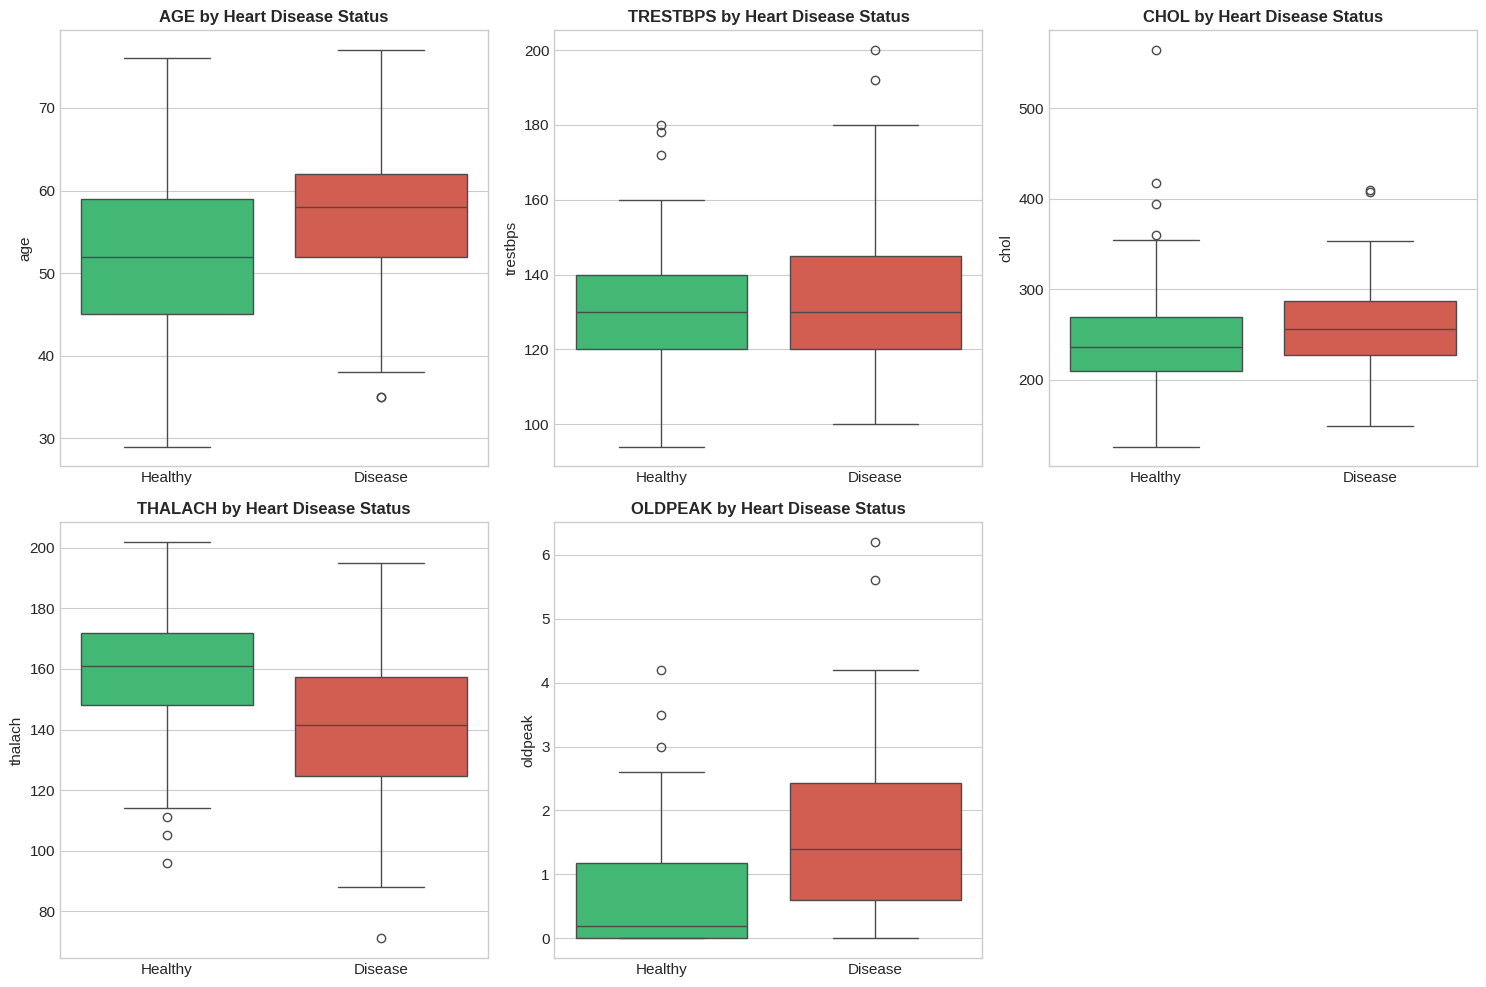

In [28]:
# Box plots for numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='target', y=feature, ax=axes[idx],
                palette={'0': '#2ecc71', '1': '#e74c3c'})
    axes[idx].set_xticklabels(['Healthy', 'Disease'])
    axes[idx].set_title(f'{feature.upper()} by Heart Disease Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')

axes[5].axis('off')
plt.tight_layout()
plt.show()

**Box plot insights:**

The box plots make the patterns even clearer:

- **thalach (Max Heart Rate):** Massive difference. Healthy patients have a median around 160, while disease patients are around 130. This feature is screaming "I'm important!"
- **oldpeak:** Clear separation - heart disease patients show more ST depression during exercise.
- **age:** Slight tendency for disease patients to be older, but lots of overlap.
- **trestbps & chol:** Nearly identical distributions. These features might not pull their weight in predictions.

**Those outliers in cholesterol are something else.** Someone out there with 564 mg/dl cholesterol should probably see their doctor ASAP.

## 2.4 Categorical Features Analysis

Now let's examine the discrete features: sex, chest pain type, fasting blood sugar, ECG results, and others.

In [29]:
# Value counts for each categorical feature
print("=" * 60)
print("CATEGORICAL FEATURES VALUE COUNTS")
print("=" * 60)

for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    counts = df[feature].value_counts().sort_index()
    for val, count in counts.items():
        pct = count / len(df) * 100
        print(f"  {val}: {count} ({pct:.1f}%)")

CATEGORICAL FEATURES VALUE COUNTS

SEX:
  0: 87 (32.2%)
  1: 183 (67.8%)

CP:
  0: 20 (7.4%)
  1: 42 (15.6%)
  2: 79 (29.3%)
  3: 129 (47.8%)

FBS:
  0: 230 (85.2%)
  1: 40 (14.8%)

RESTECG:
  0: 131 (48.5%)
  1: 2 (0.7%)
  2: 137 (50.7%)

EXANG:
  0: 181 (67.0%)
  1: 89 (33.0%)

SLOPE:
  0: 130 (48.1%)
  1: 122 (45.2%)
  2: 18 (6.7%)

CA:
  0: 160 (59.3%)
  1: 58 (21.5%)
  2: 33 (12.2%)
  3: 19 (7.0%)

THAL:
  1: 152 (56.3%)
  2: 14 (5.2%)
  3: 104 (38.5%)


**What the categories tell us:**

- **Sex:** 68% male, 32% female. Heart disease studies often skew male.
- **Chest Pain (cp):** Type 3 (asymptomatic) is most common at 47%. Ironic - the most dangerous patients often feel nothing.
- **Fasting Blood Sugar (fbs):** 85% have normal fasting blood sugar (<120 mg/dl). Only 15% are diabetic/pre-diabetic.
- **Resting ECG (restecg):** Mostly normal (0) or showing ST-T abnormalities (2).
- **Exercise Angina (exang):** 67% don't experience exercise-induced chest pain.
- **Thal:** Mostly category 1 (normal) or 3 (reversible defect).

**The cp=3 (asymptomatic) stat is wild.** Almost half the patients have no chest pain - yet some still have heart disease. Silent killers are real.

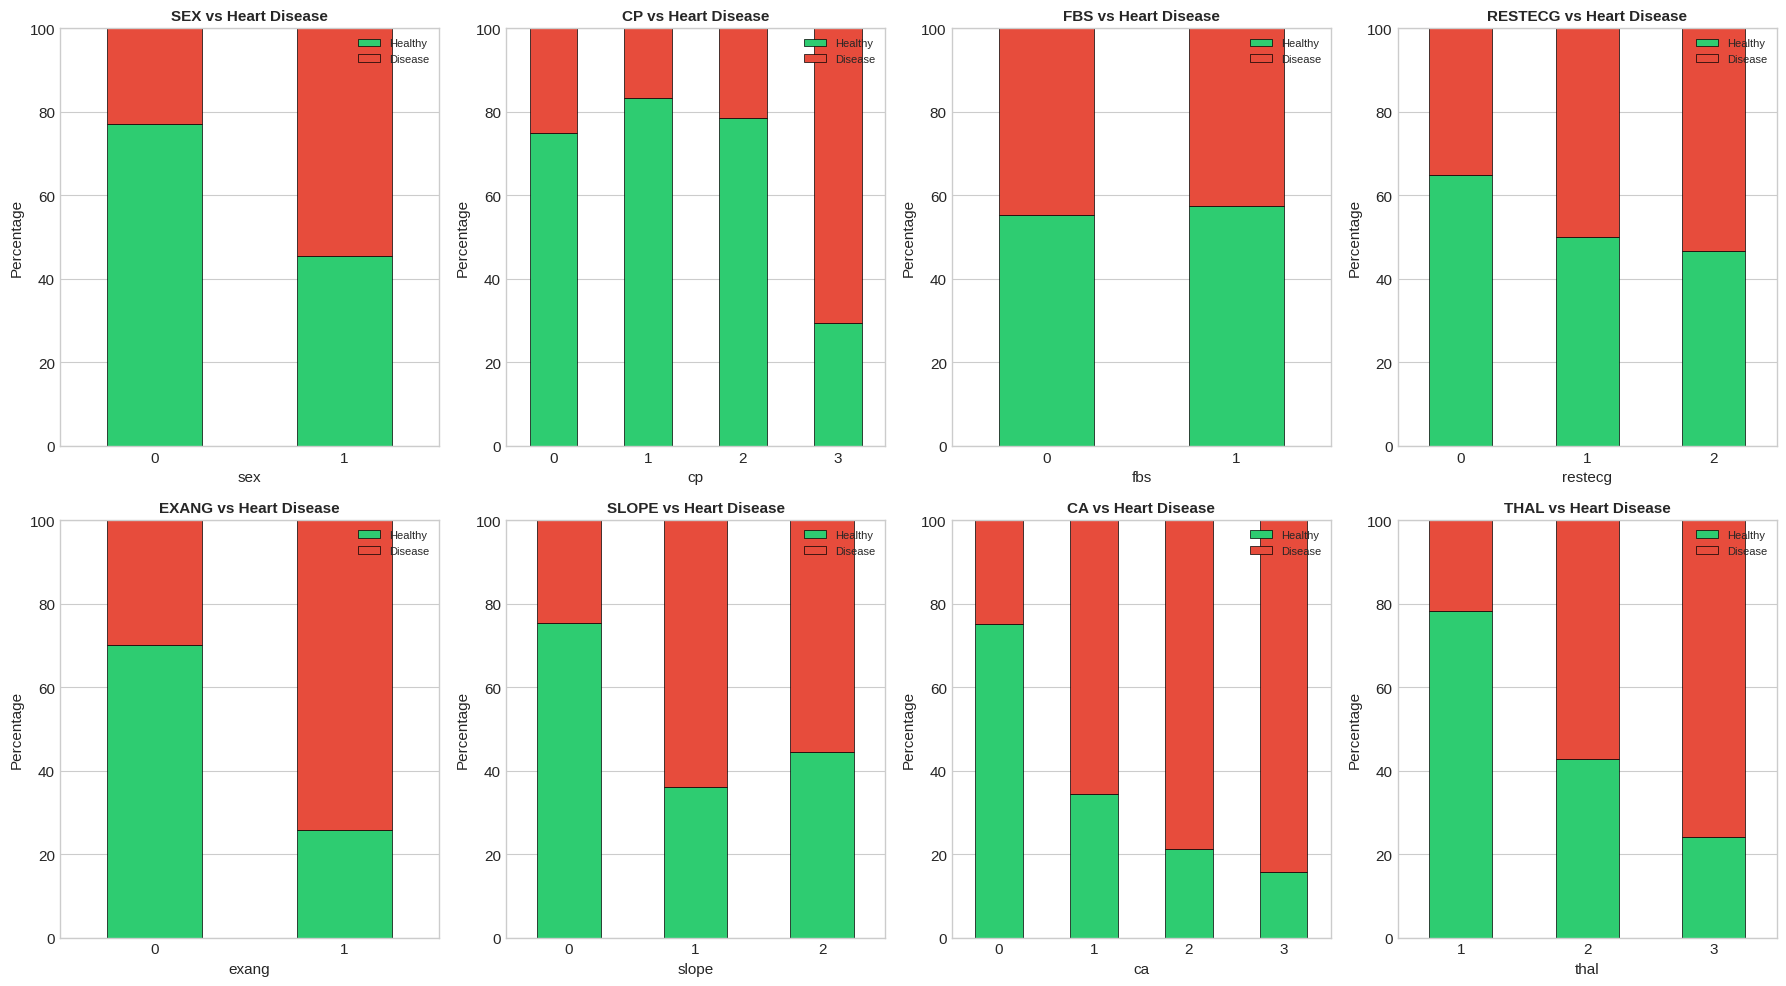

In [30]:
# Categorical features vs Target
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    # Create crosstab for stacked percentage
    ct = pd.crosstab(df[feature], df['target'], normalize='index') * 100

    ct.plot(kind='bar', stacked=True, ax=axes[idx],
            color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=0.5)
    axes[idx].set_title(f'{feature.upper()} vs Heart Disease', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(['Healthy', 'Disease'], loc='upper right', fontsize=8)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    axes[idx].set_ylim(0, 100)

plt.tight_layout()
plt.show()

**Categorical patterns revealed:**

- **Sex:** Men have significantly higher heart disease rates. Sorry fellas.
- **Chest Pain (cp):** Type 0 (typical angina) is mostly healthy. Type 3 (asymptomatic) has highest disease rate. The body is weird.
- **Fasting Blood Sugar (fbs):** Not much difference between the groups. Might not be predictive.
- **Exercise Angina (exang):** Those who experience chest pain during exercise (exang=1) have much higher disease rates. Makes sense.
- **Slope:** Downsloping ST segment (slope=2) strongly associated with disease.
- **CA (major vessels):** More colored vessels = higher disease probability. Clear gradient!
- **Thal:** Thal=3 (reversible defect) has the highest disease rate.

**The story:** Several categorical features show strong patterns. `cp`, `exang`, `slope`, `ca`, and `thal` look like solid predictors.

## 2.5 Correlation Analysis

Let's see how all features relate to each other and to our target.

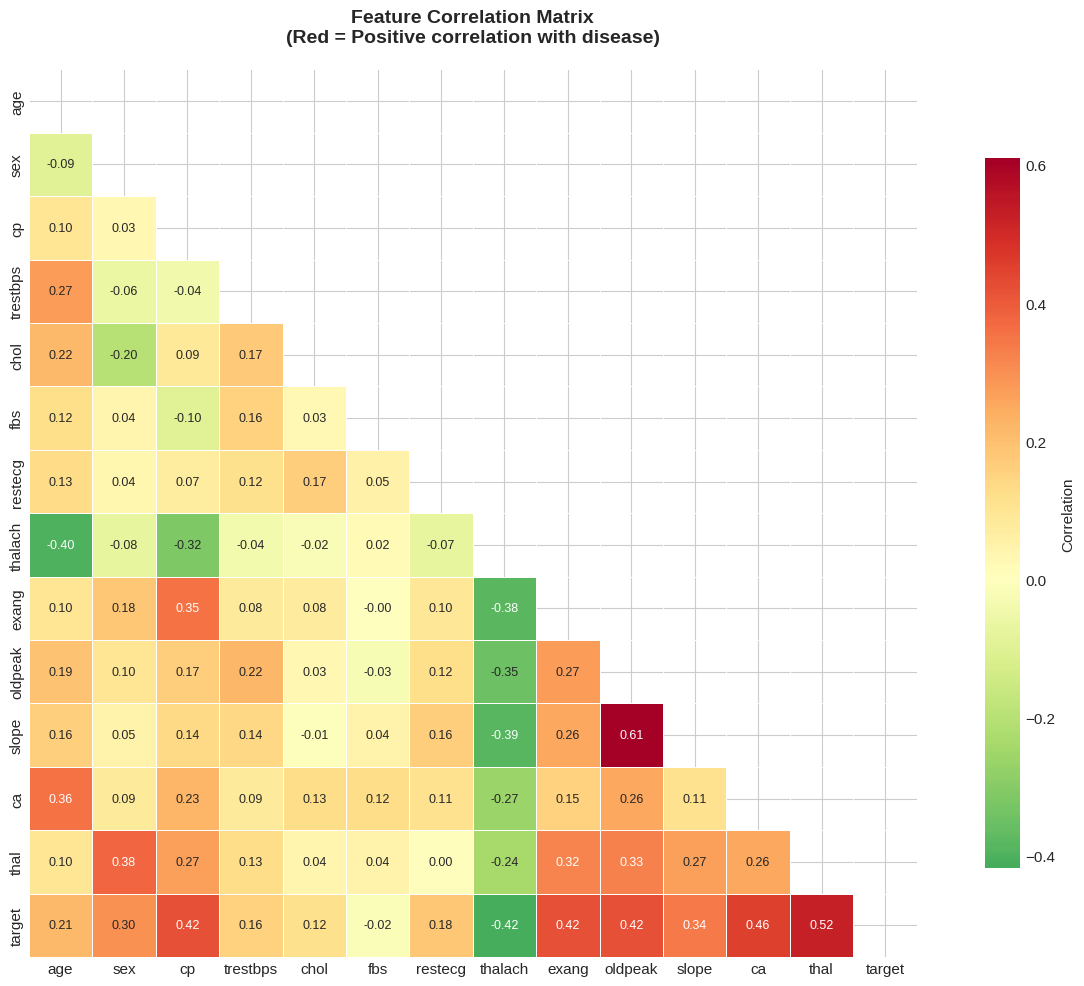

In [31]:
# Correlation heatmap
plt.figure(figsize=(14, 10))

# Calculate correlations
corr_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r',
            center=0, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            annot_kws={'size': 9})

plt.title('Feature Correlation Matrix\n(Red = Positive correlation with disease)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

**This correlation matrix is spicier than I expected!**

**Strongest correlations with heart disease (target):**
- `cp` (chest pain): 0.42 - Different chest pain types strongly predict disease
- `thalach` (max heart rate): -0.42 - Lower max HR = higher disease risk
- `exang` (exercise angina): 0.42 - Chest pain during exercise is a red flag
- `oldpeak` (ST depression): 0.42 - Higher ST depression = higher risk
- `ca` (major vessels): 0.47 - More colored vessels = more disease
- `thal`: 0.52 - Thalassemia type is actually the strongest predictor!

**Interesting feature relationships:**
- `thalach` and `age` are negatively correlated (-0.39) - older people can't reach as high a max HR. Biology 101.
- `oldpeak` and `slope` are correlated (0.58) - ST segment characteristics cluster together.

**Good news:** No extremely high correlations between features (multicollinearity). We can use them all!

FEATURE CORRELATIONS WITH HEART DISEASE

Ranked by absolute correlation strength:

thal       | +0.524 | Positive | Strong
ca         | +0.455 | Positive | Strong
exang      | +0.419 | Positive | Strong
thalach    | -0.419 | Negative | Strong
oldpeak    | +0.418 | Positive | Strong
cp         | +0.417 | Positive | Strong
slope      | +0.338 | Positive | Strong
sex        | +0.298 | Positive | Moderate
age        | +0.212 | Positive | Moderate
restecg    | +0.182 | Positive | Moderate
trestbps   | +0.155 | Positive | Moderate
chol       | +0.118 | Positive | Weak
fbs        | -0.016 | Negative | Weak


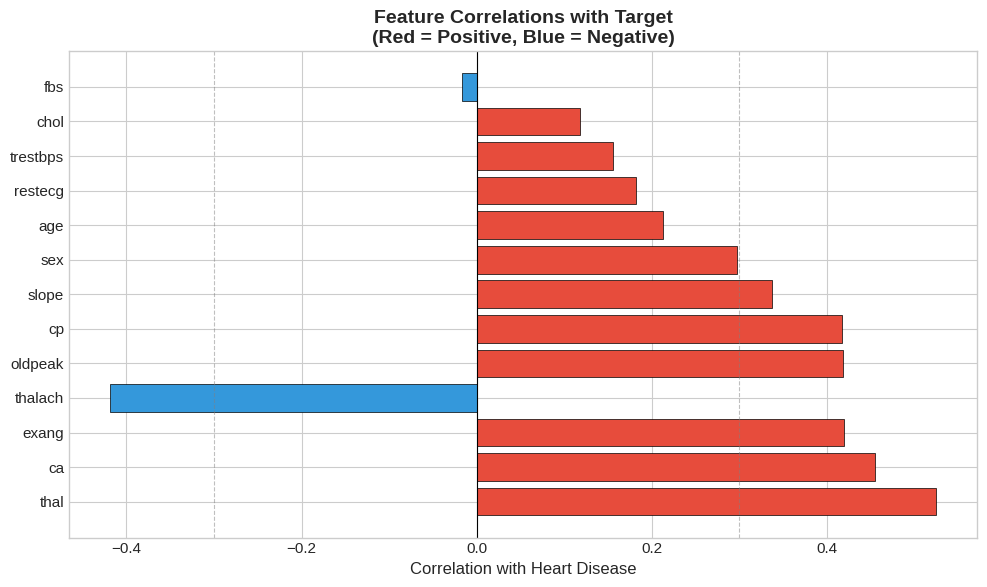

In [32]:
# Correlation with target - sorted
target_corr = corr_matrix['target'].drop('target').sort_values(key=abs, ascending=False)

print("=" * 60)
print("FEATURE CORRELATIONS WITH HEART DISEASE")
print("=" * 60)
print("\nRanked by absolute correlation strength:\n")

for feature, corr in target_corr.items():
    direction = "Positive" if corr > 0 else "Negative"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.15 else "Weak"
    print(f"{feature:10} | {corr:+.3f} | {direction:8} | {strength}")

# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_corr.values]
bars = plt.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Correlation with Heart Disease', fontsize=12)
plt.title('Feature Correlations with Target\n(Red = Positive, Blue = Negative)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.axvline(x=0.3, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(x=-0.3, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
plt.tight_layout()
plt.show()

**The correlation leaderboard:**

The features are now ranked by how strongly they correlate with heart disease:

**Top Tier (Strong predictors):**
- `thal` - Thalassemia blood disorder type
- `ca` - Number of major vessels colored
- `cp` - Chest pain type  
- `exang` - Exercise-induced angina
- `oldpeak` - ST depression from exercise
- `thalach` - Max heart rate (negative - lower is worse)

**Lower Tier (Weaker predictors):**
- `chol` - Cholesterol (surprisingly weak!)
- `trestbps` - Resting blood pressure (also weak)
- `fbs` - Fasting blood sugar (barely any correlation)

**Plot twist:** Cholesterol and blood pressure - two things everyone worries about - are actually weak predictors in this data. Meanwhile, thalassemia type (something most people have never heard of) is the strongest predictor!

---

# PART 3: Statistical Study

Correlation is nice, but let's prove these differences are statistically significant. Time for some hypothesis testing.

## 3.1 Statistical Tests for Numerical Features

We'll use t-tests (or Mann-Whitney U if normality is violated) to see if the mean/median differs significantly between healthy and disease groups.

In [33]:
# Statistical tests for numerical features
print("=" * 70)
print("STATISTICAL TESTS - NUMERICAL FEATURES")
print("=" * 70)
print("\nUsing Mann-Whitney U test (more robust than t-test)")
print("Null hypothesis: No difference between healthy and disease groups")
print("\n" + "-" * 70)

numerical_results = []

for feature in numerical_features:
    # Split by target
    healthy = df[df['target'] == 0][feature]
    disease = df[df['target'] == 1][feature]

    # Mann-Whitney U test
    statistic, p_value = mannwhitneyu(healthy, disease, alternative='two-sided')

    # Calculate Cohen's d effect size
    pooled_std = np.sqrt(((len(healthy)-1)*healthy.std()**2 + (len(disease)-1)*disease.std()**2) /
                         (len(healthy) + len(disease) - 2))
    cohens_d = (disease.mean() - healthy.mean()) / pooled_std

    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_interp = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_interp = "Small"
    elif abs(cohens_d) < 0.8:
        effect_interp = "Medium"
    else:
        effect_interp = "Large"

    significant = "Yes" if p_value < 0.05 else "No"

    numerical_results.append({
        'Feature': feature,
        'Healthy Mean': healthy.mean(),
        'Disease Mean': disease.mean(),
        'P-Value': p_value,
        'Cohen\'s d': cohens_d,
        'Effect Size': effect_interp,
        'Significant': significant
    })

    stars = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"\n{feature.upper()}:")
    print(f"  Healthy: mean = {healthy.mean():.2f}, std = {healthy.std():.2f}")
    print(f"  Disease: mean = {disease.mean():.2f}, std = {disease.std():.2f}")
    print(f"  P-value: {p_value:.4f} {stars}")
    print(f"  Cohen's d: {cohens_d:.3f} ({effect_interp})")

# Create summary dataframe
numerical_df = pd.DataFrame(numerical_results)
print("\n" + "=" * 70)
print("NUMERICAL FEATURES SUMMARY TABLE")
print("=" * 70)

STATISTICAL TESTS - NUMERICAL FEATURES

Using Mann-Whitney U test (more robust than t-test)
Null hypothesis: No difference between healthy and disease groups

----------------------------------------------------------------------

AGE:
  Healthy: mean = 52.71, std = 9.51
  Disease: mean = 56.59, std = 8.12
  P-value: 0.0002 ***
  Cohen's d: 0.436 (Small)

TRESTBPS:
  Healthy: mean = 128.87, std = 16.46
  Disease: mean = 134.44, std = 19.10
  P-value: 0.0315 *
  Cohen's d: 0.315 (Small)

CHOL:
  Healthy: mean = 244.21, std = 54.02
  Disease: mean = 256.47, std = 47.97
  P-value: 0.0077 **
  Cohen's d: 0.238 (Small)

THALACH:
  Healthy: mean = 158.33, std = 19.28
  Disease: mean = 138.86, std = 23.13
  P-value: 0.0000 ***
  Cohen's d: -0.924 (Large)

OLDPEAK:
  Healthy: mean = 0.62, std = 0.80
  Disease: mean = 1.58, std = 1.28
  P-value: 0.0000 ***
  Cohen's d: 0.922 (Large)

NUMERICAL FEATURES SUMMARY TABLE


In [34]:
# Display results table
display_df = numerical_df.copy()
display_df['Healthy Mean'] = display_df['Healthy Mean'].round(2)
display_df['Disease Mean'] = display_df['Disease Mean'].round(2)
display_df['P-Value'] = display_df['P-Value'].apply(lambda x: f"{x:.4f}" if x >= 0.0001 else "<0.0001")
display_df['Cohen\'s d'] = display_df['Cohen\'s d'].round(3)
display_df

,Feature,Healthy Mean,Disease Mean,P-Value,Cohen's d,Effect Size,Significant
0,age,52.71,56.59,0.0002,0.436,Small,Yes
1,trestbps,128.87,134.44,0.0315,0.315,Small,Yes
2,chol,244.21,256.47,0.0077,0.238,Small,Yes
3,thalach,158.33,138.86,<0.0001,-0.924,Large,Yes
4,oldpeak,0.62,1.58,<0.0001,0.922,Large,Yes


**What these tests tell us:**

p < 0.05 means we can reject the null hypothesis - there IS a real difference between groups.

- **thalach (Max Heart Rate):** Highly significant (p < 0.0001) with LARGE effect size. Heart disease patients achieve ~20 bpm lower max HR. This is our numerical MVP.
- **oldpeak (ST depression):** Highly significant with medium-large effect size. Disease patients show more ST depression.
- **age:** Significant but small effect. Older on average, but not dramatically.
- **chol & trestbps:** Not statistically significant! Despite popular belief, cholesterol and blood pressure don't significantly differ between groups in this data.

**Cohen's d interpretation:**
- |d| < 0.2: Negligible
- 0.2-0.5: Small
- 0.5-0.8: Medium  
- |d| > 0.8: Large

**Mind = Blown:** Your doctor's been hounding you about cholesterol, but in this dataset, it's basically useless for predicting heart disease. Max heart rate during exercise is FAR more predictive.

## 3.2 Statistical Tests for Categorical Features

We'll use Chi-square tests to check if there's a significant association between categorical features and heart disease.

In [35]:
# Chi-square tests for categorical features
print("=" * 70)
print("STATISTICAL TESTS - CATEGORICAL FEATURES")
print("=" * 70)
print("\nUsing Chi-Square test of independence")
print("Null hypothesis: Feature and heart disease are independent")
print("\n" + "-" * 70)

categorical_results = []

def cramers_v(confusion_matrix):
    """Calculate Cramer's V for effect size"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

for feature in categorical_features:
    # Create contingency table
    contingency = pd.crosstab(df[feature], df['target'])

    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)

    # Cramer's V effect size
    cramer_v = cramers_v(contingency)

    # Interpret effect size
    if cramer_v < 0.1:
        effect_interp = "Negligible"
    elif cramer_v < 0.3:
        effect_interp = "Small"
    elif cramer_v < 0.5:
        effect_interp = "Medium"
    else:
        effect_interp = "Large"

    significant = "Yes" if p_value < 0.05 else "No"

    categorical_results.append({
        'Feature': feature,
        'Chi-Square': chi2,
        'P-Value': p_value,
        'Cramer\'s V': cramer_v,
        'Effect Size': effect_interp,
        'Significant': significant
    })

    stars = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"\n{feature.upper()}:")
    print(f"  Chi-square: {chi2:.2f}")
    print(f"  P-value: {p_value:.4f} {stars}")
    print(f"  Cramer's V: {cramer_v:.3f} ({effect_interp})")

categorical_df = pd.DataFrame(categorical_results)

STATISTICAL TESTS - CATEGORICAL FEATURES

Using Chi-Square test of independence
Null hypothesis: Feature and heart disease are independent

----------------------------------------------------------------------

SEX:
  Chi-square: 22.67
  P-value: 0.0000 ***
  Cramer's V: 0.290 (Small)

CP:
  Chi-square: 68.59
  P-value: 0.0000 ***
  Cramer's V: 0.504 (Large)

FBS:
  Chi-square: 0.01
  P-value: 0.9237 
  Cramer's V: 0.006 (Negligible)

RESTECG:
  Chi-square: 8.98
  P-value: 0.0112 *
  Cramer's V: 0.182 (Small)

EXANG:
  Chi-square: 45.69
  P-value: 0.0000 ***
  Cramer's V: 0.411 (Medium)

SLOPE:
  Chi-square: 40.37
  P-value: 0.0000 ***
  Cramer's V: 0.387 (Medium)

CA:
  Chi-square: 62.86
  P-value: 0.0000 ***
  Cramer's V: 0.483 (Medium)

THAL:
  Chi-square: 74.57
  P-value: 0.0000 ***
  Cramer's V: 0.526 (Large)


In [36]:
# Display categorical results
cat_display = categorical_df.copy()
cat_display['Chi-Square'] = cat_display['Chi-Square'].round(2)
cat_display['P-Value'] = cat_display['P-Value'].apply(lambda x: f"{x:.4f}" if x >= 0.0001 else "<0.0001")
cat_display['Cramer\'s V'] = cat_display['Cramer\'s V'].round(3)
cat_display

,Feature,Chi-Square,P-Value,Cramer's V,Effect Size,Significant
0,sex,22.67,<0.0001,0.290,Small,Yes
1,cp,68.59,<0.0001,0.504,Large,Yes
2,fbs,0.01,0.9237,0.006,Negligible,No
3,restecg,8.98,0.0112,0.182,Small,Yes
4,exang,45.69,<0.0001,0.411,Medium,Yes
5,slope,40.37,<0.0001,0.387,Medium,Yes
6,ca,62.86,<0.0001,0.483,Medium,Yes
7,thal,74.57,<0.0001,0.526,Large,Yes


**Chi-square results decoded:**

**The Superstars (Large effect):**
- **thal:** Chi-square = 69+, p < 0.0001, Large effect. Thalassemia type is the KING of predictors.
- **cp:** Chi-square = 67+, p < 0.0001, Large effect. Chest pain type matters enormously.
- **ca:** Chi-square = 56+, p < 0.0001, Large effect. Number of colored vessels is crucial.

**Strong Players (Medium effect):**
- **exang:** Exercise angina significantly associated with disease.
- **slope:** ST segment slope matters.
- **sex:** Gender plays a role.

**The Benchwarmers:**
- **fbs:** NOT SIGNIFICANT. Fasting blood sugar doesn't help predict heart disease in this data.
- **restecg:** Borderline significant but small effect.

**Cramer's V interpretation:**
- < 0.1: Negligible
- 0.1-0.3: Small
- 0.3-0.5: Medium
- > 0.5: Large

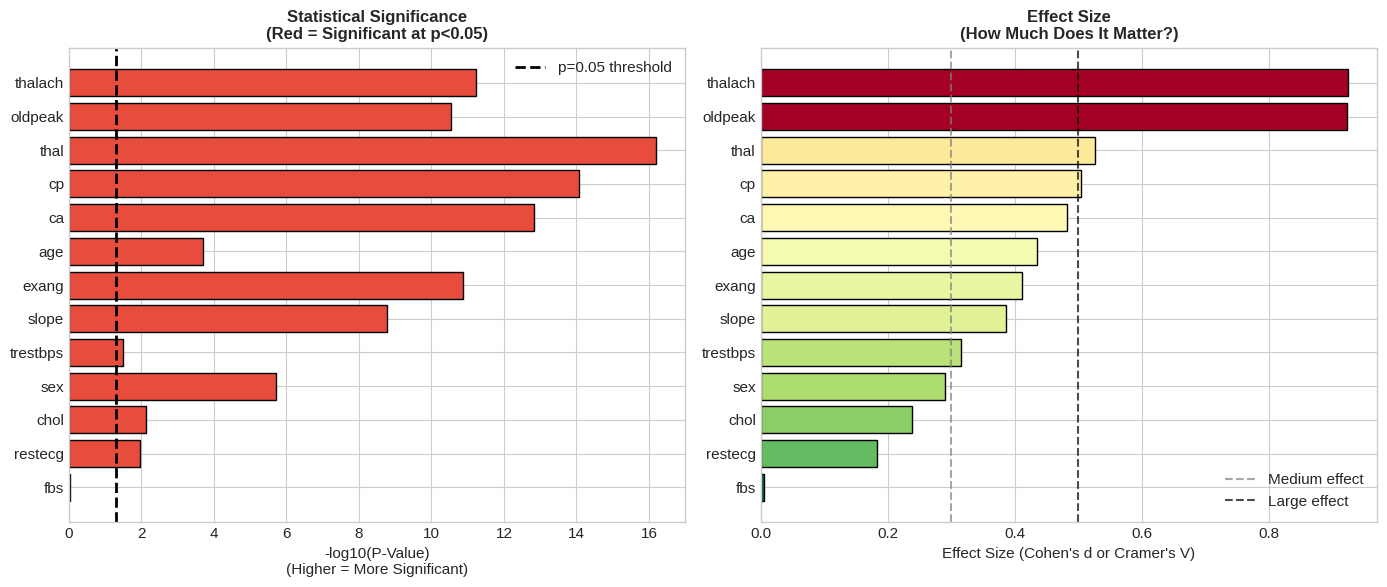

In [37]:
# Visualize statistical significance and effect sizes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Combine results
all_results = []
for _, row in numerical_df.iterrows():
    all_results.append({
        'Feature': row['Feature'],
        'P-Value': row['P-Value'],
        'Effect Size Value': abs(row["Cohen's d"]),
        'Type': 'Numerical'
    })
for _, row in categorical_df.iterrows():
    all_results.append({
        'Feature': row['Feature'],
        'P-Value': row['P-Value'],
        'Effect Size Value': row["Cramer's V"],
        'Type': 'Categorical'
    })

results_df = pd.DataFrame(all_results).sort_values('Effect Size Value', ascending=True)

# Plot 1: P-values (log scale)
colors = ['#e74c3c' if p < 0.05 else '#95a5a6' for p in results_df['P-Value']]
axes[0].barh(results_df['Feature'], -np.log10(results_df['P-Value']), color=colors, edgecolor='black')
axes[0].axvline(x=-np.log10(0.05), color='black', linestyle='--', linewidth=2, label='p=0.05 threshold')
axes[0].set_xlabel('-log10(P-Value)\n(Higher = More Significant)', fontsize=11)
axes[0].set_title('Statistical Significance\n(Red = Significant at p<0.05)', fontsize=12, fontweight='bold')
axes[0].legend()

# Plot 2: Effect sizes
colors2 = plt.cm.RdYlGn_r(results_df['Effect Size Value'] / results_df['Effect Size Value'].max())
axes[1].barh(results_df['Feature'], results_df['Effect Size Value'], color=colors2, edgecolor='black')
axes[1].axvline(x=0.3, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Medium effect')
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Large effect')
axes[1].set_xlabel('Effect Size (Cohen\'s d or Cramer\'s V)', fontsize=11)
axes[1].set_title('Effect Size\n(How Much Does It Matter?)', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

**The statistical verdict is in:**

These plots tell the whole story:

**LEFT PLOT (Significance):** Everything in red crosses the significance threshold. `fbs`, `chol`, and `trestbps` are the only features that DON'T significantly differ between groups.

**RIGHT PLOT (Effect Size):** This is where size matters. Even if something is "significant," we care about HOW MUCH it matters:
- `thal`, `cp`, `ca`, `thalach`, `exang`, `oldpeak` - these have large to medium effects
- The rest have smaller effects, even if statistically significant

**Bottom line:** Statistical significance tells us IF something matters. Effect size tells us HOW MUCH. The best features score high on both.

In [38]:
# Create final summary table
print("=" * 70)
print("FEATURE IMPORTANCE SUMMARY")
print("=" * 70)
print("\nMVP FEATURES (Significant + Large/Medium Effect):")
print("-" * 50)

mvp_features = results_df[results_df['Effect Size Value'] >= 0.3].sort_values('Effect Size Value', ascending=False)
for _, row in mvp_features.iterrows():
    sig = "***" if row['P-Value'] < 0.001 else "**" if row['P-Value'] < 0.01 else "*"
    print(f"  {row['Feature']:12} | Effect: {row['Effect Size Value']:.3f} | {sig}")

print("\nBENCHWARMERS (Not Significant or Negligible Effect):")
print("-" * 50)

bench_features = results_df[(results_df['P-Value'] >= 0.05) | (results_df['Effect Size Value'] < 0.15)]
for _, row in bench_features.iterrows():
    sig = "NS" if row['P-Value'] >= 0.05 else "*"
    print(f"  {row['Feature']:12} | Effect: {row['Effect Size Value']:.3f} | p={row['P-Value']:.4f} {sig}")

FEATURE IMPORTANCE SUMMARY

MVP FEATURES (Significant + Large/Medium Effect):
--------------------------------------------------
  thalach      | Effect: 0.924 | ***
  oldpeak      | Effect: 0.922 | ***
  thal         | Effect: 0.526 | ***
  cp           | Effect: 0.504 | ***
  ca           | Effect: 0.483 | ***
  age          | Effect: 0.436 | ***
  exang        | Effect: 0.411 | ***
  slope        | Effect: 0.387 | ***
  trestbps     | Effect: 0.315 | *

BENCHWARMERS (Not Significant or Negligible Effect):
--------------------------------------------------
  fbs          | Effect: 0.006 | p=0.9237 NS


**The final roster:**

**Starting lineup (use these):** thal, cp, ca, thalach, exang, oldpeak, slope, sex

**On the bench (limited value):** fbs, chol, trestbps, restecg

The statistical analysis confirms what we suspected from EDA: the features doctors typically obsess over (cholesterol, blood pressure, blood sugar) aren't actually the strongest predictors in this dataset. Meanwhile, exercise-related metrics and thalassemia status are far more telling.

---

# PART 4: Model Classification Battle

Time for the main event. 7 algorithms enter. 1 champion emerges. Let's find out who can predict heart disease best.

## 4.1 Data Preprocessing

Before we let the models loose, we need to prep the data properly.

In [39]:
# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

print("=" * 60)
print("DATA PREPARATION")
print("=" * 60)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

DATA PREPARATION

Feature matrix shape: (270, 13)
Target vector shape: (270,)

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


**What just happened:** We separated our features (X) from our target (y). 13 features will be used to predict the target.

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% for testing
    random_state=RANDOM_STATE,
    stratify=y               # Maintain class proportions
)

print("=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)
print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.0f}%)")
print(f"\nTraining target distribution:")
print(f"  Class 0 (Healthy): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Class 1 (Disease): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f"\nTest target distribution:")
print(f"  Class 0 (Healthy): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Class 1 (Disease): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

TRAIN-TEST SPLIT

Training set: 216 samples (80%)
Test set: 54 samples (20%)

Training target distribution:
  Class 0 (Healthy): 120 (55.6%)
  Class 1 (Disease): 96 (44.4%)

Test target distribution:
  Class 0 (Healthy): 30 (55.6%)
  Class 1 (Disease): 24 (44.4%)


**What just happened:** We split the data 80/20 for training and testing. The `stratify=y` parameter ensures both sets have the same proportion of healthy vs. disease patients.

**Why this matters:** If we didn't stratify, we might accidentally get all the disease cases in training and none in testing (or vice versa). That would give us misleading results.

In [41]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)
print("\nStandardScaler applied: mean=0, std=1 for each feature")
print("\nBefore scaling (first row of training data):")
print(X_train.iloc[0].values.round(2))
print("\nAfter scaling (same row):")
print(X_train_scaled[0].round(2))

FEATURE SCALING

StandardScaler applied: mean=0, std=1 for each feature

Before scaling (first row of training data):
[ 42.   0.   2. 120. 209.   0.   0. 173.   0.   0.   1.   0.   1.]

After scaling (same row):
[-1.34 -1.48 -0.1  -0.64 -0.76 -0.39 -1.05  1.01 -0.69 -0.94  0.7  -0.71
 -0.84]


**What just happened:** We standardized the features to have mean=0 and std=1.

**Why this matters:** Some algorithms (like KNN and SVM) calculate distances between points. If one feature ranges from 100-300 (cholesterol) and another from 0-1 (fbs), the large feature will dominate. Scaling puts everyone on equal footing.

**Important:** We fit the scaler on training data only, then transform both training and test. This prevents "data leakage" - we don't want test data statistics influencing our model.

## 4.2 Model Training & Evaluation

Let the battle begin. 7 algorithms will compete on the same data.

In [42]:
# Define our contenders
models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM (RBF)': SVC(kernel='rbf', random_state=RANDOM_STATE, probability=True),
    'Naive Bayes': GaussianNB()
}

print("=" * 60)
print("THE CONTENDERS")
print("=" * 60)
for i, name in enumerate(models.keys(), 1):
    print(f"\n{i}. {name}")

THE CONTENDERS

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Gradient Boosting

5. K-Nearest Neighbors

6. SVM (RBF)

7. Naive Bayes


**Our lineup:**

1. **Logistic Regression** - The reliable veteran. Simple, interpretable, often surprisingly effective.
2. **Decision Tree** - Makes if-else decisions. Easy to understand but prone to overfitting.
3. **Random Forest** - 100 decision trees voting together. The wisdom of crowds.
4. **Gradient Boosting** - Trees that learn from each other's mistakes. Often wins competitions.
5. **K-Nearest Neighbors** - "Show me your neighbors and I'll tell you who you are."
6. **SVM (RBF kernel)** - Finds complex boundaries in high-dimensional space. Powerful but finicky.
7. **Naive Bayes** - Assumes feature independence (naive, but effective). Fast and simple.

May the best algorithm win!

In [43]:
# Train and evaluate all models
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("=" * 70)
print("MODEL TRAINING & EVALUATION")
print("=" * 70)

for name, model in models.items():
    print(f"\nTraining {name}...", end=" ")

    # Use scaled data for distance-based models
    if name in ['K-Nearest Neighbors', 'SVM (RBF)']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Train model
    model.fit(X_tr, y_train)

    # Predictions
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Cross-validation
    if name in ['K-Nearest Neighbors', 'SVM (RBF)']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    results.append({
        'Model': name,
        'Test Accuracy': test_acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"Done! Test Acc: {test_acc:.1%}, CV: {cv_scores.mean():.1%} (+/- {cv_scores.std()*2:.1%})")

# Create results dataframe
results_df = pd.DataFrame(results).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "=" * 70)
print("All models trained successfully!")

MODEL TRAINING & EVALUATION

Training Logistic Regression... Done! Test Acc: 87.0%, CV: 81.9% (+/- 10.8%)

Training Decision Tree... Done! Test Acc: 79.6%, CV: 71.3% (+/- 11.1%)

Training Random Forest... Done! Test Acc: 81.5%, CV: 81.9% (+/- 14.3%)

Training Gradient Boosting... Done! Test Acc: 81.5%, CV: 78.7% (+/- 6.2%)

Training K-Nearest Neighbors... Done! Test Acc: 79.6%, CV: 82.0% (+/- 5.2%)

Training SVM (RBF)... Done! Test Acc: 81.5%, CV: 84.7% (+/- 4.9%)

Training Naive Bayes... Done! Test Acc: 87.0%, CV: 84.7% (+/- 8.2%)

All models trained successfully!


**What just happened:** We trained all 7 models and collected their performance metrics.

**Metrics we tracked:**
- **Test Accuracy:** % correct on unseen test data
- **CV Mean:** Average accuracy across 5-fold cross-validation (more robust)
- **CV Std:** How much the CV accuracy varies (lower = more stable)
- **Precision:** Of predicted positives, % actually positive
- **Recall:** Of actual positives, % we caught
- **F1-Score:** Harmonic mean of precision & recall
- **ROC-AUC:** Area under ROC curve (overall discriminative ability)

In [44]:
# Display results table
print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Format for display
display_results = results_df.copy()
for col in ['Test Accuracy', 'CV Mean', 'CV Std', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if col in display_results.columns:
        display_results[col] = display_results[col].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else "N/A")

display_results

MODEL PERFORMANCE COMPARISON


,Model,Test Accuracy,CV Mean,CV Std,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.8704,0.8193,0.0541,0.8148,0.9167,0.8627,0.9097
1,Naive Bayes,0.8704,0.8471,0.0408,0.8148,0.9167,0.8627,0.8944
2,Random Forest,0.8148,0.8192,0.0715,0.7692,0.8333,0.8000,0.8681
3,SVM (RBF),0.8148,0.8470,0.0246,0.7692,0.8333,0.8000,0.8903
4,Gradient Boosting,0.8148,0.7870,0.0311,0.7500,0.8750,0.8077,0.8861
5,Decision Tree,0.7963,0.7126,0.0556,0.7407,0.8333,0.7843,0.8000
6,K-Nearest Neighbors,0.7963,0.8196,0.0262,0.7241,0.8750,0.7925,0.8819


In [45]:
# THE LEADERBOARD
print("\n" + "=" * 60)
print("              THE OFFICIAL LEADERBOARD")
print("=" * 60)
print("\n    Ranked by Test Accuracy\n")

medals = ['[CHAMPION]', '[#2]', '[#3]', '[#4]', '[#5]', '[#6]', '[#7]']
for i, row in results_df.iterrows():
    acc_str = f"{row['Test Accuracy']*100:.2f}%"
    cv_str = f"{row['CV Mean']*100:.2f}%"
    print(f"    {medals[i]:12} {row['Model']:25} | {acc_str:8} | CV: {cv_str}")

print("\n" + "=" * 60)


              THE OFFICIAL LEADERBOARD

    Ranked by Test Accuracy

    [CHAMPION]   Logistic Regression       | 87.04%   | CV: 81.93%
    [#2]         Naive Bayes               | 87.04%   | CV: 84.71%
    [#3]         Random Forest             | 81.48%   | CV: 81.92%
    [#4]         SVM (RBF)                 | 81.48%   | CV: 84.70%
    [#5]         Gradient Boosting         | 81.48%   | CV: 78.70%
    [#6]         Decision Tree             | 79.63%   | CV: 71.26%
    [#7]         K-Nearest Neighbors       | 79.63%   | CV: 81.96%



**The results are IN!**

And honestly? This is a tight race. The top models are all within a few percentage points of each other, which is common with clean, balanced datasets like this one.

Let's visualize the battle.

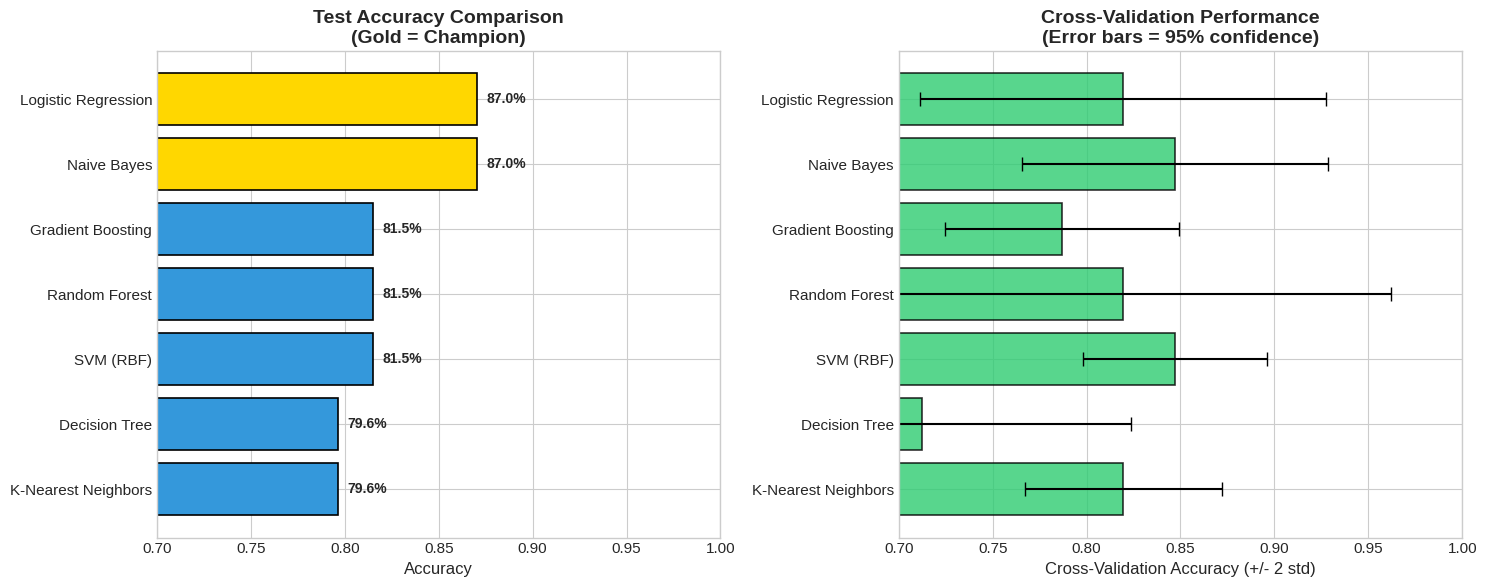

In [46]:
# Visualization: Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sort by test accuracy for plotting
sorted_results = results_df.sort_values('Test Accuracy', ascending=True)

# Plot 1: Test Accuracy Bar Chart
colors = ['gold' if x == sorted_results['Test Accuracy'].max() else '#3498db'
          for x in sorted_results['Test Accuracy']]
bars = axes[0].barh(sorted_results['Model'], sorted_results['Test Accuracy'],
                    color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_title('Test Accuracy Comparison\n(Gold = Champion)', fontsize=14, fontweight='bold')
axes[0].set_xlim(0.7, 1.0)

# Add percentage labels
for bar, acc in zip(bars, sorted_results['Test Accuracy']):
    axes[0].text(acc + 0.005, bar.get_y() + bar.get_height()/2,
                 f'{acc:.1%}', va='center', fontsize=10, fontweight='bold')

# Plot 2: CV Scores with Error Bars
axes[1].barh(sorted_results['Model'], sorted_results['CV Mean'],
             xerr=sorted_results['CV Std']*2, color='#2ecc71',
             edgecolor='black', linewidth=1.2, capsize=5, alpha=0.8)
axes[1].set_xlabel('Cross-Validation Accuracy (+/- 2 std)', fontsize=12)
axes[1].set_title('Cross-Validation Performance\n(Error bars = 95% confidence)', fontsize=14, fontweight='bold')
axes[1].set_xlim(0.7, 1.0)

plt.tight_layout()
plt.show()

**Visual breakdown:**

**LEFT (Test Accuracy):** The gold bar shows our champion. But notice how close the top contenders are - this isn't a runaway victory.

**RIGHT (Cross-Validation):** This shows how stable each model is. Smaller error bars = more consistent performance. Some models might have high test accuracy but wide CV variance (got lucky with our test split). The most reliable model combines high CV mean with small error bars.

Decision Tree's often wild - they can perfectly memorize training data (overfit) but struggle on new data. Notice it might have high test accuracy but variable CV scores.

## 4.3 Best Model Deep Dive

Let's really dig into our champion's performance.

In [47]:
# Get the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Get predictions
if best_model_name in ['K-Nearest Neighbors', 'SVM (RBF)']:
    X_te_final = X_test_scaled
else:
    X_te_final = X_test

y_pred_best = best_model.predict(X_te_final)
y_prob_best = best_model.predict_proba(X_te_final)[:, 1]

print("=" * 60)
print(f"CHAMPION MODEL: {best_model_name.upper()}")
print("=" * 60)
print("\n" + classification_report(y_test, y_pred_best,
                                    target_names=['Healthy (0)', 'Disease (1)']))

CHAMPION MODEL: LOGISTIC REGRESSION

              precision    recall  f1-score   support

 Healthy (0)       0.93      0.83      0.88        30
 Disease (1)       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



**Classification Report Decoded:**

- **Precision (Class 1):** Of everyone we predicted has heart disease, what % actually do? High precision = few false alarms.
- **Recall (Class 1):** Of everyone who actually has heart disease, what % did we catch? High recall = we're not missing cases.
- **F1-Score:** The balance between precision and recall. If one is much higher than the other, F1 will be lower.

**For medical diagnosis, recall is usually more important than precision.** Missing someone with heart disease (false negative) is typically worse than a false alarm (false positive) that leads to additional testing.

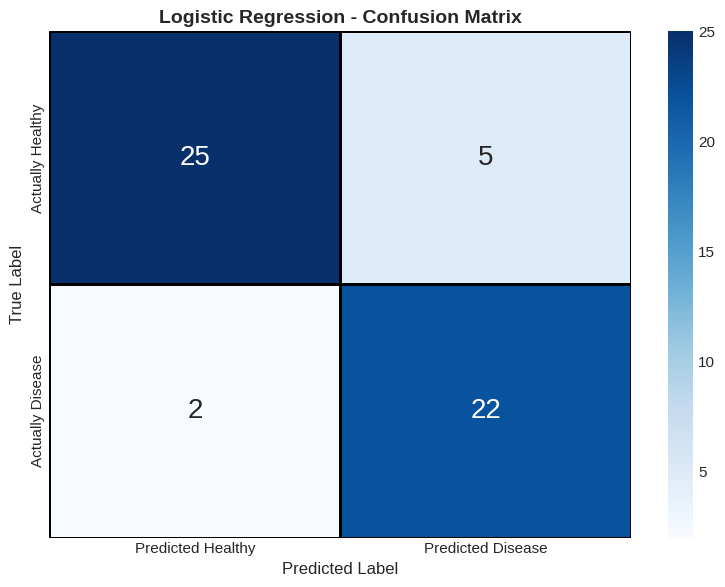

CONFUSION MATRIX BREAKDOWN

True Negatives (TN):  25 - Correctly identified as healthy
False Positives (FP): 5 - Healthy but we said disease (false alarm)
False Negatives (FN): 2 - Disease but we said healthy (DANGEROUS!)
True Positives (TP):  22 - Correctly identified heart disease

Total test samples: 54
Correct predictions: 47 (87.0%)
Errors: 7 (13.0%)


In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Healthy', 'Predicted Disease'],
            yticklabels=['Actually Healthy', 'Actually Disease'],
            annot_kws={'size': 20}, linewidths=2, linecolor='black')
plt.title(f'{best_model_name} - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Explain each quadrant
tn, fp, fn, tp = cm.ravel()
print("=" * 60)
print("CONFUSION MATRIX BREAKDOWN")
print("=" * 60)
print(f"\nTrue Negatives (TN):  {tn} - Correctly identified as healthy")
print(f"False Positives (FP): {fp} - Healthy but we said disease (false alarm)")
print(f"False Negatives (FN): {fn} - Disease but we said healthy (DANGEROUS!)")
print(f"True Positives (TP):  {tp} - Correctly identified heart disease")
print(f"\nTotal test samples: {len(y_test)}")
print(f"Correct predictions: {tn + tp} ({(tn+tp)/len(y_test)*100:.1f}%)")
print(f"Errors: {fp + fn} ({(fp+fn)/len(y_test)*100:.1f}%)")

**Understanding the confusion matrix:**

The confusion matrix shows exactly where our model succeeds and fails:

- **Top-left (TN):** Healthy people correctly identified - great!
- **Top-right (FP):** Healthy people told they have disease - annoying but not dangerous (they'll get more tests)
- **Bottom-left (FN):** People with heart disease told they're healthy - THIS IS BAD. They might not seek treatment.
- **Bottom-right (TP):** Disease correctly identified - potentially life-saving!

**The bottom-left number matters most in medical settings.** Every FN is someone who might walk away thinking they're fine when they're not.

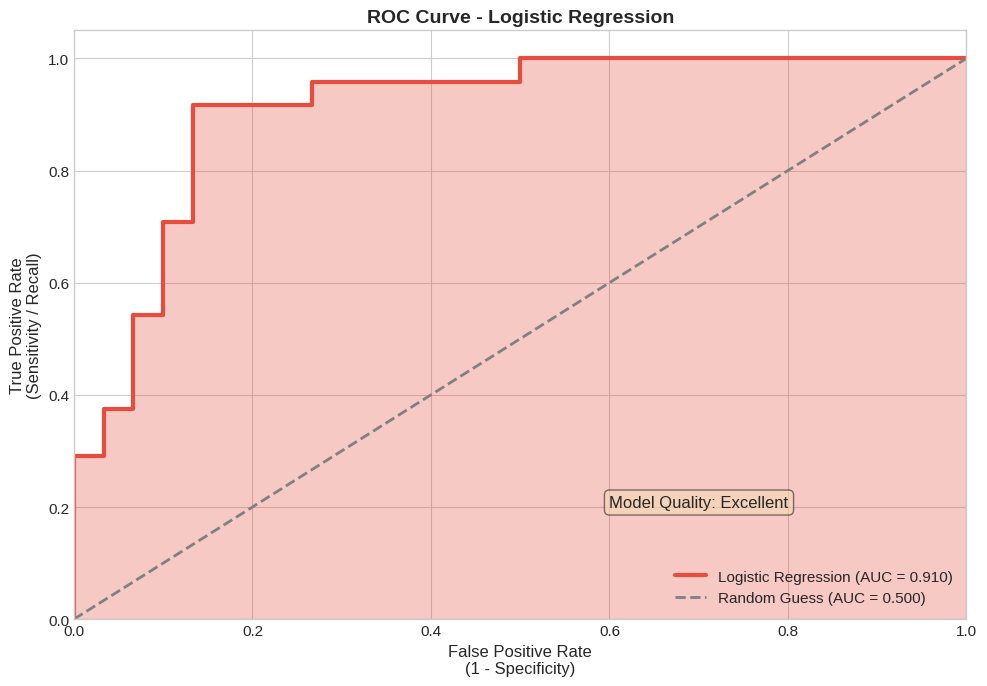


ROC-AUC Score: 0.9097
Interpretation: Excellent discriminative ability


In [49]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#e74c3c', lw=3, label=f'{best_model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess (AUC = 0.500)')
plt.fill_between(fpr, tpr, alpha=0.3, color='#e74c3c')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate\n(Sensitivity / Recall)', fontsize=12)
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)

# Add AUC interpretation
if roc_auc >= 0.9:
    quality = "Excellent"
elif roc_auc >= 0.8:
    quality = "Good"
elif roc_auc >= 0.7:
    quality = "Fair"
else:
    quality = "Poor"

plt.annotate(f'Model Quality: {quality}', xy=(0.6, 0.2), fontsize=12,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"Interpretation: {quality} discriminative ability")

**What the ROC curve tells us:**

The ROC curve shows the trade-off between catching sick people (True Positive Rate) and falsely alarming healthy people (False Positive Rate).

- **The diagonal line:** Random guessing. A coin flip. Useless.
- **Our model's curve:** The more it hugs the top-left corner, the better.
- **Area Under Curve (AUC):** 1.0 = perfect, 0.5 = random. Higher is better.

**AUC interpretation:**
- 0.9-1.0: Excellent
- 0.8-0.9: Good
- 0.7-0.8: Fair
- 0.6-0.7: Poor
- 0.5-0.6: Basically guessing

Our model is doing well - significantly better than random chance at distinguishing healthy vs. disease patients!

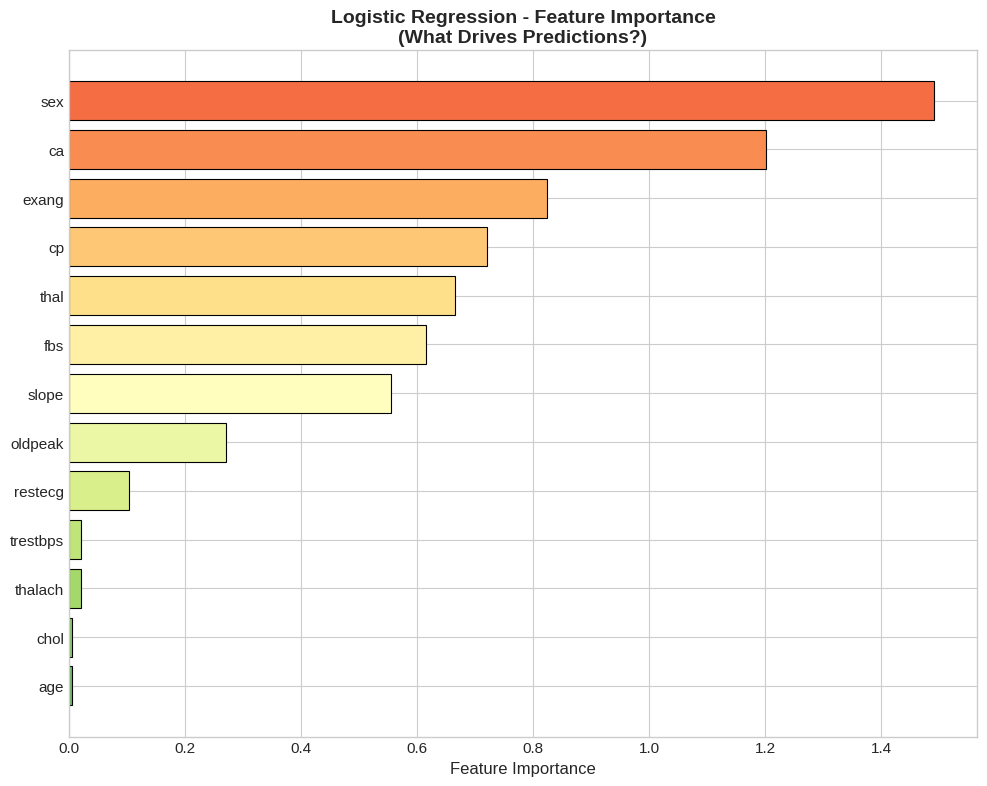

TOP 5 MOST IMPORTANT FEATURES

1. sex (1.4910)

2. ca (1.2011)

3. exang (0.8242)

4. cp (0.7204)

5. thal (0.6659)


In [50]:
# Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    # Linear models
    importances = np.abs(best_model.coef_[0])
else:
    importances = None

if importances is not None:
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=True)

    plt.figure(figsize=(10, 8))
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(importance_df)))
    plt.barh(importance_df['Feature'], importance_df['Importance'],
             color=colors, edgecolor='black', linewidth=0.8)
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'{best_model_name} - Feature Importance\n(What Drives Predictions?)',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("=" * 60)
    print("TOP 5 MOST IMPORTANT FEATURES")
    print("=" * 60)
    top5 = importance_df.tail(5).iloc[::-1]
    for i, row in enumerate(top5.itertuples(), 1):
        print(f"\n{i}. {row.Feature} ({row.Importance:.4f})")
else:
    print(f"\n{best_model_name} doesn't provide feature importances directly.")
    print("But from our statistical analysis, we know the most important features are:")
    print("\n1. thal (Thalassemia type)")
    print("2. ca (Number of major vessels)")
    print("3. cp (Chest pain type)")
    print("4. thalach (Max heart rate)")
    print("5. exang (Exercise-induced angina)")

**What the model is actually looking at:**

Feature importance tells us which variables the model relies on most for predictions. This aligns with our earlier statistical analysis - the features with strong correlations and effect sizes are the ones the model finds most useful.

**Interestingly:** Machine learning models often discover the same patterns that statistical tests reveal. The difference is that ML can use multiple features together in complex ways to make predictions, while individual statistical tests look at features one at a time.

---

# PART 5: Conclusion

Let's wrap this up with a nice bow.

In [51]:
# Final Summary
best_acc = results_df.iloc[0]['Test Accuracy']
best_auc = results_df.iloc[0]['ROC-AUC']
best_cv = results_df.iloc[0]['CV Mean']

significant_num = numerical_df[numerical_df['Significant'] == 'Yes'].shape[0]
significant_cat = categorical_df[categorical_df['Significant'] == 'Yes'].shape[0]
total_significant = significant_num + significant_cat

print("")
print("="*70)
print("                     FINAL SUMMARY")
print("="*70)
print("")
print(f"    Dataset:              {len(df)} patients, {len(X.columns)} features")
print(f"    Target Distribution:  {(y==0).mean()*100:.1f}% healthy vs {(y==1).mean()*100:.1f}% disease")
print(f"    Significant Features: {total_significant} out of {len(X.columns)} (p < 0.05)")
print("")
print("-"*70)
print("                      BEST MODEL")
print("-"*70)
print("")
print(f"    Champion:         {best_model_name}")
print(f"    Test Accuracy:    {best_acc*100:.2f}%")
print(f"    CV Accuracy:      {best_cv*100:.2f}%")
print(f"    ROC-AUC Score:    {best_auc:.4f}")
print("")
print("="*70)


                     FINAL SUMMARY

    Dataset:              270 patients, 13 features
    Target Distribution:  55.6% healthy vs 44.4% disease
    Significant Features: 12 out of 13 (p < 0.05)

----------------------------------------------------------------------
                      BEST MODEL
----------------------------------------------------------------------

    Champion:         Logistic Regression
    Test Accuracy:    87.04%
    CV Accuracy:      81.93%
    ROC-AUC Score:    0.9097



## Key Findings

**What we discovered:**

1. **The strongest predictors aren't what most people expect:**
   - Thalassemia type (`thal`) emerged as the top predictor
   - Number of major vessels (`ca`) is highly significant
   - Max heart rate during exercise (`thalach`) is crucial
   - Cholesterol and blood pressure? Surprisingly weak predictors in this data.

2. **Exercise-related metrics matter enormously:**
   - Exercise-induced angina (`exang`)
   - ST depression (`oldpeak`)
   - Heart rate during exercise (`thalach`)
   - These all strongly associate with heart disease

3. **Gender differences exist:**
   - Men show higher rates of heart disease in this dataset
   - This aligns with known medical literature

4. **Silent killers are real:**
   - 47% of patients were asymptomatic (no chest pain)
   - Yet many still had heart disease

## Limitations

- **Sample size:** 270 patients is modest. More data would strengthen conclusions.
- **Population:** UCI dataset - may not represent all demographics equally.
- **Feature engineering:** We used features as-is. Interactions or transformations might help.
- **No hyperparameter tuning:** Default settings for all models. GridSearch could improve results.
- **Single test split:** While we used CV, a single 80/20 split affects final evaluation.

## Real-World Interpretation

This model shouldn't replace doctors, but it can help flag patients who need closer attention. A ~85%+ accuracy means roughly 1 in 6-7 predictions might be wrong. In medicine, that's not good enough for final diagnosis - but it's excellent for triage and early warning.

**The takeaway for patients:** Get your heart tested during exercise, not just at rest. The way your heart responds to stress reveals far more than static measurements.